In [1]:
import shapely

In [4]:
import geopandas as gpd

In [5]:
basin_path = "Clip/CalSimIII_AllWatersheds_20200417_WGS84.shp"

In [6]:
data = gpd.read_file(basin_path)

In [11]:
data.head(1)

,OBJECTID_1,OBJECTID,Type,I_arc,Remarks,Acres,HR,Connect_No,SQ_MI,SR_ID,Dups,Incr_Drain,CT_Name,GraphicID,tempnode,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,1,1,Rim,I_MSH015,Marsh Creek inflows to the Delta,55856.98501,SJR,MSH015,87.276539,NaN,0,NaN,NaN,0,MSH015,91465.448012,91465.448012,2.260452e+08,"POLYGON ((-121.82460 37.97590, -121.81524 37.9..."


In [8]:
%matplotlib inline

<AxesSubplot: >

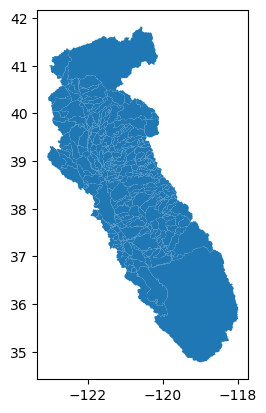

In [9]:
data.plot()

In [12]:
from shapely.geometry import Point, Polygon

In [24]:
p = Point(-119, 36.4)

In [31]:
data.head()

,OBJECTID_1,OBJECTID,Type,I_arc,Remarks,Acres,HR,Connect_No,SQ_MI,SR_ID,Dups,Incr_Drain,CT_Name,GraphicID,tempnode,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,1,1,Rim,I_MSH015,Marsh Creek inflows to the Delta,55856.985010,SJR,MSH015,87.276539,NaN,0,NaN,NaN,0,MSH015,91465.448012,91465.448012,2.260452e+08,"POLYGON ((-121.82460 37.97590, -121.81524 37.9..."
1,2,2,Rim,I_ORT014,Orestimba Creek,90436.290629,SJR,ORT014,141.306704,NaN,0,Btwn SJR070/SJR117,NaN,0,ORT014,133184.180672,133184.180672,3.659827e+08,"POLYGON ((-121.31781 37.37547, -121.31787 37.3..."
2,3,3,Rim,I_SLUIS,Local inflows to San Luis Reservoir,55770.981744,SJR,SLUIS,87.142159,NaN,0,Above SJR117,NaN,0,SLUIS,79700.589673,79700.589673,2.256972e+08,"POLYGON ((-121.17446 37.13155, -121.17365 37.1..."
3,4,4,Rim,I_BANOS,Los Banos Creek inflows to Los Banos Reservoir,95740.717436,SJR,BANOS,149.594871,NaN,0,Above SJR117,NaN,0,BANOS,123893.265229,123893.265229,3.874489e+08,"POLYGON ((-121.06578 37.00018, -121.06545 36.9..."
4,5,5,Rim,I_COW014,Cow Creek,245782.475232,SAC,COW014,384.035118,NaN,0,Above SAC257,CT_BENDBRIDGE,2,COW014,155732.700697,155732.700697,9.946464e+08,"POLYGON ((-121.63964 40.63957, -121.64122 40.6..."


In [36]:
polygons = data[['OBJECTID', 'geometry']]

In [37]:
polygons.shape

(386, 2)

In [27]:
p.x

-119.0

In [42]:
for i, subbasin in polygons.iterrows():

    polygon = subbasin.geometry
    if p.within(polygon):
        print(subbasin.OBJECTID)
        break

25


In [2]:
import panel as pn
pn.extension()

import climakitae as ck

In [3]:
app = ck.Application()

Row
    [0] Card(collapsible=False, title='Data selections', width=450)
        [0] Row
            [0] Column(width=220)
                [0] ParamMethod(method, _pane=Matplotlib)
                [1] RangeSlider(end=2100, start=1950, step=1, value=(1980, 2015), value_end=2015, value_start=1980)
                [2] StaticText(name='Historical Data', value='<br>Estimates o...)
                [3] CheckBoxGroup(name='Scenario historical', options=OrderedDict([('Historical ...]), value=['Historical Climate'])
                [4] StaticText(name='Future Model Data', value='<br> Shared S...)
                [5] CheckBoxGroup(name='Scenario ssp', options=OrderedDict([('SSP 2-4.5 -...]))
            [1] Column(width=210)
                [0] StaticText(name='Downscaling method')
                [1] CheckBoxGroup(disabled=True, name='Downscaling method', options=OrderedDict([('Dynamical',...]), value=['Dynamical'])
                [2] StaticText(name='Timescale')
                [3] Select(options=OrderedDict([('hourly', ...]), value='monthly')
                [4] StaticText(name='Variable')
                [5] Select(options=OrderedDict([('Air Tempera...]), value='Air Temperature at 2m')
                [6] StaticText(value="Temperature o...)
                [7] StaticText(name='Variable Units')
                [8] RadioButtonGroup(name='Units', options=OrderedDict([('K', ...]), value='K')
                [9] StaticText(style={'color': 'red'})
    [1] Card(collapsible=False, title='Location selections')
        [0] Row
            [0] Column(width=190)
                [0] StaticText(value='Model resolution')
                [1] RadioButtonGroup(name='Resolution', options=OrderedDict([('45 km', ...]), value='45 km')
                [2] Select(name='Subset the data by...', options=OrderedDict([('none', ...]), value='none')
                [3] Select(name='Location selection', options=OrderedDict([('entire doma...]), value='entire domain')
                [4] RangeSlider(end=67, name='Latitude', start=10, value=(32.5, 42), value_end=42, value_start=32.5)
                [5] RangeSlider(end=-84.18701, name='Longitude', start=-156.82317, value=(-125.5, -114), value_end=-114, value_start=-125.5)
            [1] Column(width=200)
                [0] ParamMethod(method, _pane=Matplotlib)
                [1] StaticText(value='Compute an area a...)
                [2] RadioButtonGroup(name='Area average', options=OrderedDict([('Yes', ...]), value='No')
    [2] Column
        [0] Card(collapsible=False, title='How to use this panel', width=250)
            [0] StaticText(value='\n            In the firs...)
        [1] Card(collapsible=False, title='Current selections', width=250)
            [0] StaticText(value="<font size='+0.10'>Data s...)
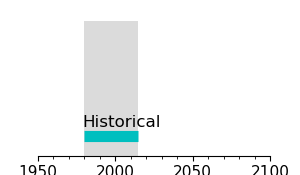
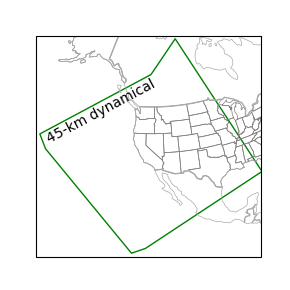

In [4]:
app.select()


In [5]:
data_to_use = app.retrieve()


In [6]:
data_to_use


<xarray.DataArray 'Air Temperature at 2m' (scenario: 1, simulation: 4,
                                           time: 1028, y: 22, x: 32)>
dask.array<broadcast_to, shape=(1, 4, 1028, 22, 32), dtype=float32, chunksize=(1, 1, 534, 22, 32), chunktype=numpy.ndarray>
Coordinates:
    lakemask           (y, x) float32 dask.array<chunksize=(22, 32), meta=np.ndarray>
    landmask           (y, x) float32 dask.array<chunksize=(22, 32), meta=np.ndarray>
    lat                (y, x) float32 dask.array<chunksize=(22, 32), meta=np.ndarray>
    lon                (y, x) float32 dask.array<chunksize=(22, 32), meta=np.ndarray>
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-08-01
  * x                  (x) float64 -4.134e+06 -4.131e+06 ... -4.041e+06
  * y                  (y) float64 1.322e+06 1.325e+06 ... 1.382e+06 1.385e+06
  * simulation         (simulation) <U13 'cesm2' 'cnrm-esm2-1' ... 'fgoals-g3'
    Lambert_Conformal  int64 0
  * scenario           (scenario) <U6 'ssp370'
Attributes:
    institution:           UCLA Center for Climate Science
    source:                https://dept.atmos.ucla.edu/alexhall/downscaling-c...
    location_subset:       San Joaquin Delta
    resolution:            3 km
    frequency:             monthly
    grid_mapping:          Lambert_Conformal
    variable_id:           t2
    extended_description:  Temperature of the air 2m above Earth's surface. T...
    units:                 K

In [7]:
data_to_use = app.load(data_to_use)

Reading 11.04 MB of data into memory... complete!


In [8]:
app.view(data_to_use)

:DynamicMap   [simulation,time,scenario]
   :Image   [x,y]   (Air Temperature at 2m)

In [4]:
import intake
col = intake.open_esm_datastore('https://cadcat.s3.amazonaws.com/cae-collection.json')

In [2]:
col

,unique
activity_id,2
institution_id,3
source_id,18
experiment_id,5
member_id,15
table_id,3
variable_id,48
grid_label,3
path,3223
derived_variable_id,0


In [3]:
for k, v in col.items():
    print(k)
    #print(dir(v))
    #print(v.df)
    #print(v.df['path'])
    for i, row in v.df.iterrows():
        print(row)
        
    break

LOCA2.UCSD.KACE-1-0-G.ssp370.day.d03
activity_id                                                   LOCA2
institution_id                                                 UCSD
source_id                                                KACE-1-0-G
experiment_id                                                ssp370
member_id                                                  r1i1p1f1
table_id                                                        day
variable_id                                                    huss
grid_label                                                      d03
path              s3://cadcat/loca2/ucsd/kace-1-0-g/ssp370/r1i1p...
_data_format_                                                  zarr
Name: 0, dtype: object
activity_id                                                   LOCA2
institution_id                                                 UCSD
source_id                                                KACE-1-0-G
experiment_id                                           

In [2]:
import rasterio as rio